/Users/mac/Downloads/yes/lib/python3.7/site-packages/ipykernel_launcher.py:17: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


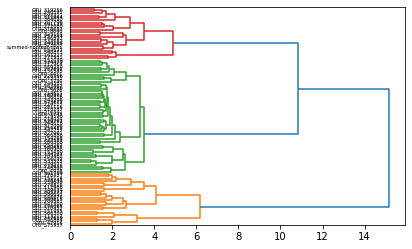

In [18]:
import pandas as pd 
import scipy.spatial
import scipy.cluster
import numpy as np
import json
import matplotlib.pyplot as plt
from functools import reduce
import skbio
from skbio import DistanceMatrix
from skbio.stats.distance import permanova

adj=pd.read_table("adj_filter.txt", sep="\t", header=0,index_col=0,encoding='utf8')
distMat = 1-adj
#distMat

#print(distMat[1:5])
clusters = scipy.cluster.hierarchy.linkage(distMat, method='ward')
T = scipy.cluster.hierarchy.to_tree( clusters , rd=False )

labels = list(distMat.columns.values)
id2name = dict(enumerate(labels))
 
# Draw dendrogram using matplotlib to scipy-dendrogram.pdf
scipy.cluster.hierarchy.dendrogram(clusters, labels=labels, orientation='right')
plt.savefig("scipy-dendrogram.png")

def add_node(node, parent ):
    # First create the new node and append it to its parent's children
    newNode = dict( node_id=node.id, children=[] )
    parent["children"].append( newNode )
 
    # Recursively add the current node's children
    if node.left: add_node( node.left, newNode )
    if node.right: add_node( node.right, newNode )
 
# Initialize nested dictionary for d3, then recursively iterate through tree
d3Dendro = dict(children=[], name="Root1")
add_node( T, d3Dendro )
#print(d3Dendro)

tree = []

def get_group(str1,str2):
    level = pd.DataFrame(str1.split(","))
    str1_l = str1.split(",")
    str11=[1 for i in range(len(str1_l))]
    str2_l = str2.split(",")
    str22=[2 for i in range(len(str2_l))]
    test = { 'group':str11+str22}
    df_test1 = pd.DataFrame(test,index=str1_l+str2_l)
    return df_test1

dis_matrix = DistanceMatrix(list(distMat.values))
pv = []

def preorder(root):
    if not root.is_leaf():
        str1=",".join([distMat.columns.values[i] for i in root.left.pre_order()])
        str2=",".join([distMat.columns.values[i] for i in root.right.pre_order()])
        df_test = get_group(str1,str2)
        result = pd.concat([distMat, df_test], axis=1)
        result = result.dropna(axis=0, how='any')
        group = list(result["group"])
        result=result[list(result.index.values)]
        dis_matrix = DistanceMatrix(list(result.values))
        obs = permanova(dis_matrix, group)
        pvalue = obs["p-value"]
        if pvalue < 0.05:
            pv.append(pvalue)
            #print(str1,str2)
            tree.append([str1.split(","),str2.split(",")])
    if pvalue <0.05:
        preorder(root.get_left())
        preorder(root.get_right())


 
preorder(T)
#print(len(tree))
#print(pv)
#print(tree[0])
#dist_str1 = distMat[str1.split(",")].loc[str1.split(",")]
#dist_str2 = distMat[str2.split(",")].loc[str2.split(",")]

out_list=list()
for i in tree:
    a = 0
    b = 0
    for j in tree:
        if set(i[0]) > set(j[0]) or set(j[0]) > set(j[1]):
            a = a+1
        if set(i[1]) > set(j[0]) or set(j[0]) > set(j[1]):
            b = b+1
    if a == 0:
        out_list.append(i[0])
    if b == 0:
        out_list.append(i[1])

#print(len(out_list))
#print(out_list)

k_group = {}
for i in range(0,len(out_list)):
    k_group["CAG%s"%(i+1)] = out_list[i]
    
#print(k_group["CAG1"])

key = list(k_group.keys())
str_group_a = []
str_key = []
for i in key:
    str_len=[i for j in range(len(k_group[i]))]
    str_group_a.extend(str_len)
    str_key.extend(k_group[i])
test1 = {"group":str_group_a}

#print(str_group_a)
#print(str_key)
df_Final = pd.DataFrame(test1,index=str_key)
#df_Final.to_csv("CAGs_group.csv")

/Users/mac/Downloads/yes/lib/python3.7/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


['OTU_1745', 'OTU_3730', 'OTU_4411', 'OTU_4978', 'OTU_5026', 'OTU_8640', 'OTU_47916', 'OTU_111986', 'OTU_112964', 'OTU_113212', 'OTU_134163', 'OTU_136280', 'OTU_144381', 'OTU_146397', 'OTU_148890', 'OTU_151114', 'OTU_151955', 'OTU_152039', 'OTU_153450', 'OTU_154268', 'OTU_156032', 'OTU_156065', 'OTU_156545', 'OTU_156816', 'OTU_160908', 'OTU_160992', 'OTU_161227', 'OTU_204462', 'OTU_204561', 'OTU_207796', 'OTU_214611', 'OTU_216341', 'OTU_218024', 'OTU_218287', 'OTU_222080', 'OTU_222635', 'OTU_223583', 'OTU_224117', 'OTU_226506', 'OTU_239649', 'OTU_240591', 'OTU_248618', 'OTU_254262', 'OTU_257244', 'OTU_257891', 'OTU_259452', 'OTU_277931', 'OTU_278437', 'OTU_278816', 'OTU_279571', 'OTU_279590', 'OTU_281116', 'OTU_286368', 'OTU_305277', 'OTU_317096', 'OTU_318683', 'OTU_319256', 'OTU_323164', 'OTU_327961', 'OTU_328245', 'OTU_340198', 'OTU_342757', 'OTU_343296', 'OTU_347619', 'OTU_349634', 'OTU_364090', 'OTU_391129', 'OTU_510452', 'OTU_511844', 'OTU_513331', 'OTU_529793', 'OTU_533525', 'OTU

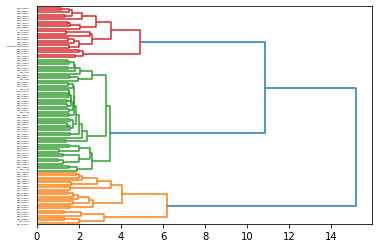

In [28]:
clusters = scipy.cluster.hierarchy.linkage(distMat, method='ward')
T = scipy.cluster.hierarchy.to_tree( clusters , rd=False )

labels = list(distMat.columns.values)
id2name = dict(enumerate(labels))
 
# Draw dendrogram using matplotlib to scipy-dendrogram.pdf
d = scipy.cluster.hierarchy.dendrogram(clusters, labels=labels, orientation='right',leaf_font_size=2)
#test2 = {"group1":d["leaves_color_list"]}
#plt.savefig('750x750.png', dpi=500,bbbox_inches='tight')
#print(labels)

In [30]:
def get_newick(node, parent_dist, leaf_names, newick='') -> str:
    """
    Convert sciply.cluster.hierarchy.to_tree()-output to Newick format.

    :param node: output of sciply.cluster.hierarchy.to_tree()
    :param parent_dist: output of sciply.cluster.hierarchy.to_tree().dist
    :param leaf_names: list of leaf names
    :param newick: leave empty, this variable is used in recursion.
    :returns: tree in Newick format
    """
    if node.is_leaf():
        return "%s:%.2f%s" % (leaf_names[node.id], parent_dist - node.dist, newick)
    else:
        if len(newick) > 0:
            newick = "):%.2f%s" % (parent_dist - node.dist, newick)
        else:
            newick = ");"
        newick = get_newick(node.get_left(), node.dist, leaf_names, newick=newick)
        newick = get_newick(node.get_right(), node.dist, leaf_names, newick=",%s" % (newick))
        newick = "(%s" % (newick)
        return newick

tree = scipy.cluster.hierarchy.to_tree(clusters, False)
get_newick(tree, tree.dist, labels)

'(((((((((OTU_319256:1.13,OTU_240591:1.13):0.38,OTU_593321:1.50):0.17,(OTU_511844:1.35,OTU_364090:1.35):0.32):0.45,OTU_207796:2.12):0.70,(((OTU_391129:1.50,OTU_222080:1.50):0.09,OTU_318683:1.59):0.46,OTU_8640:2.04):0.77):0.71,(((OTU_323164:1.40,OTU_257244:1.40):1.10,OTU_146397:2.51):0.12,(((OTU_533587:1.48,OTU_340198:1.48):0.29,OTU_573607:1.76):0.26,(summed-nonfeat-rows:1.54,OTU_584527:1.54):0.48):0.61):0.90):1.37,((OTU_546873:2.00,OTU_161227:2.00):0.19,(OTU_277931:1.80,OTU_152039:1.80):0.39):2.70):5.96,((((((((OTU_534479:1.41,OTU_112964:1.41):0.10,OTU_559239:1.51):0.24,(OTU_257891:1.48,OTU_156545:1.48):0.28):0.07,OTU_4411:1.83):0.24,OTU_226506:2.07):0.57,((OTU_513331:1.59,OTU_3730:1.59):0.35,OTU_144381:1.94):0.69):0.66,((((((((OTU_563862:1.48,OTU_136280:1.48):0.24,OTU_5026:1.71):0.03,((((((OTU_214611:1.53,OTU_160992:1.53):0.00,OTU_156816:1.53):0.00,OTU_343296:1.53):0.07,(OTU_573812:1.41,OTU_224117:1.41):0.19):0.03,(OTU_281116:1.41,OTU_218287:1.41):0.21):0.08,(OTU_216341:1.53,OTU_1745: